# Extracting Data Online website using API

In [1]:
#import opendatasets as od

#dataset='**************************************************'
#od.download(dataset)

# Importing Library Files

In [2]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import keras as kt
import cv2
import os

# Importing Data from the directory

In [3]:
train=image.ImageDataGenerator(rescale = 1/255)
test=image.ImageDataGenerator(rescale = 1/255)

In [4]:
train= train.flow_from_directory('acne-data/Created Dataset/train/',
                                 class_mode='binary',
                                 batch_size=2,
                                target_size=(150, 150))
test= test.flow_from_directory('acne-data/Created Dataset/test/',
                               class_mode='binary',
                               batch_size=2,
                              target_size=(150, 150))

Found 382 images belonging to 2 classes.
Found 144 images belonging to 2 classes.


Preview of the image from the training dataset

Text(0.5, 0, 'acne image')

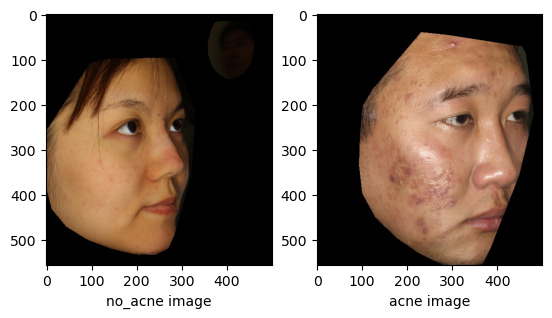

In [5]:
no_acne=cv2.imread('acne-data/Created Dataset/train/Level_0/levle0_152.jpg')
acne=cv2.imread('acne-data/Created Dataset/train/Level_2/levle2_100.jpg')

no_acne=cv2.cvtColor(no_acne, cv2.COLOR_BGR2RGB)
acne=cv2.cvtColor(acne, cv2.COLOR_BGR2RGB)

plt.subplot(1,2,1)
plt.imshow(no_acne)
plt.xlabel('no_acne image')
plt.subplot(1,2,2)
plt.imshow(acne)
plt.xlabel('acne image')

In [6]:
unique, counts = np.unique(train.classes, return_counts=True)
print(unique,counts)

[0 1] [288  94]


Here our target columns is indices as 0 (no_acne) and 1(acne) 

In [7]:
print('classes in dataset',train.class_indices)
print('Batch size send ',train.batch_size)
print('dimension of each image',train.image_shape)

classes in dataset {'Level_0': 0, 'Level_2': 1}
Batch size send  2
dimension of each image (150, 150, 3)


Target variable in the dataset

In [8]:
from tensorflow import keras
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout #,BatchNormalization,GlobalAvgPool2D
from tensorflow.keras import Sequential

In [9]:
model = Sequential()

model.add(Conv2D(filters = 8, kernel_size = 2,padding ='valid',strides=2, input_shape = (150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters = 8, kernel_size = 2,padding = 'valid',strides=2 ))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())

model.add(Dense(32, activation = "relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation = "sigmoid"))

In [10]:
tf.keras.losses.BinaryCrossentropy(
                                from_logits=False,
                                label_smoothing=0.0,
                                axis=-1,
                                reduction="auto",
                                name="binary_crossentropy")

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 75, 75, 8)         104       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 37, 37, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 18, 18, 8)         264       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 9, 9, 8)          0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 648)               0         
                                                                 
 dense (Dense)               (None, 32)                2

In [12]:
hist= model.fit(train,epochs=20,validation_data=test,verbose=2)

Epoch 1/20
191/191 - 3s - loss: 0.6051 - accuracy: 0.7539 - val_loss: 0.5994 - val_accuracy: 0.6875 - 3s/epoch - 16ms/step
Epoch 2/20
191/191 - 2s - loss: 0.5809 - accuracy: 0.7487 - val_loss: 0.5938 - val_accuracy: 0.6875 - 2s/epoch - 11ms/step
Epoch 3/20
191/191 - 2s - loss: 0.5783 - accuracy: 0.7513 - val_loss: 0.5859 - val_accuracy: 0.6875 - 2s/epoch - 11ms/step
Epoch 4/20
191/191 - 2s - loss: 0.5502 - accuracy: 0.7670 - val_loss: 0.5710 - val_accuracy: 0.7222 - 2s/epoch - 11ms/step
Epoch 5/20
191/191 - 2s - loss: 0.5565 - accuracy: 0.7618 - val_loss: 0.5614 - val_accuracy: 0.7500 - 2s/epoch - 11ms/step
Epoch 6/20
191/191 - 2s - loss: 0.5257 - accuracy: 0.7618 - val_loss: 0.5606 - val_accuracy: 0.7431 - 2s/epoch - 11ms/step
Epoch 7/20
191/191 - 2s - loss: 0.5245 - accuracy: 0.7670 - val_loss: 0.5634 - val_accuracy: 0.7708 - 2s/epoch - 11ms/step
Epoch 8/20
191/191 - 2s - loss: 0.5117 - accuracy: 0.7696 - val_loss: 0.5634 - val_accuracy: 0.7569 - 2s/epoch - 11ms/step
Epoch 9/20
191/1

In [13]:
np.mean(hist.history['val_accuracy'])

0.7413194447755813

In [14]:
img = cv2.resize(acne,dsize=(150,150)) # resize as per model input
img = img.reshape((1,) + img.shape) # adding extra dimension to represent as 1 sample/batch


img1 =cv2.resize(no_acne,dsize=(150,150)) # resize as per model input
img1 = img1.reshape((1,) + img1.shape) # adding extra dimension to represent as 1 sample/batch

In [15]:
for i in range(len(model.layers)):
    if 'conv' not in model.layers[i].name:
        continue
    filters, biases = model.layers[i].get_weights()
    print("layer number",i,model.layers[i].name,'filter shape', filters.shape)

layer number 0 conv2d filter shape (2, 2, 3, 8)
layer number 2 conv2d_1 filter shape (2, 2, 8, 8)


In [16]:
model1= kt.Model(model.inputs,model.layers[1].output)

1/1 [==============================] - 0s 71ms/step


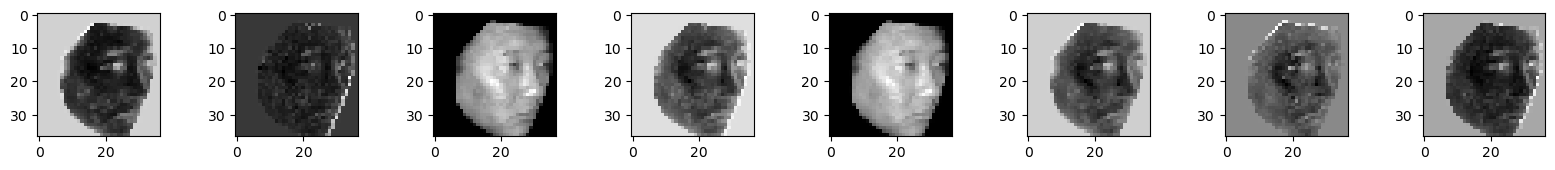

In [17]:
#calculating features_map
features = model1.predict(img)

fig = plt.figure(figsize=(20,15))
for i in range(1,features.shape[3]+1):
    plt.subplot(8,8,i)
    plt.imshow(features[0,:,:,i-1] , cmap='gray')
    
plt.show()

1/1 [==============================] - 0s 30ms/step


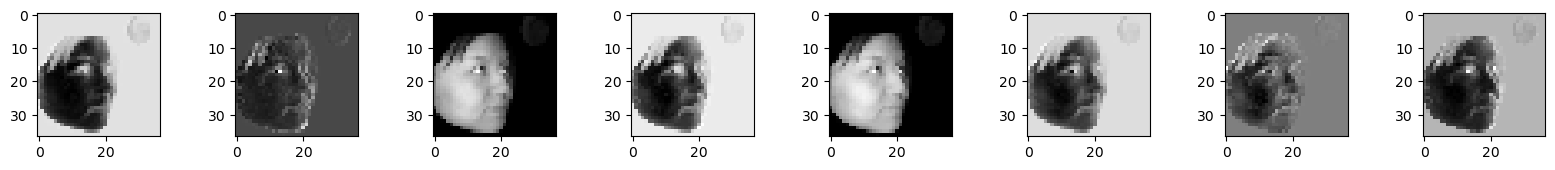

In [18]:
#calculating features_map
features = model1.predict(img1)

fig = plt.figure(figsize=(20,15))
for i in range(1,features.shape[3]+1):
    plt.subplot(8,8,i)
    plt.imshow(features[0,:,:,i-1] , cmap='gray')
    
plt.show()

For multi layer convolution

1/1 [==============================] - 0s 51ms/step


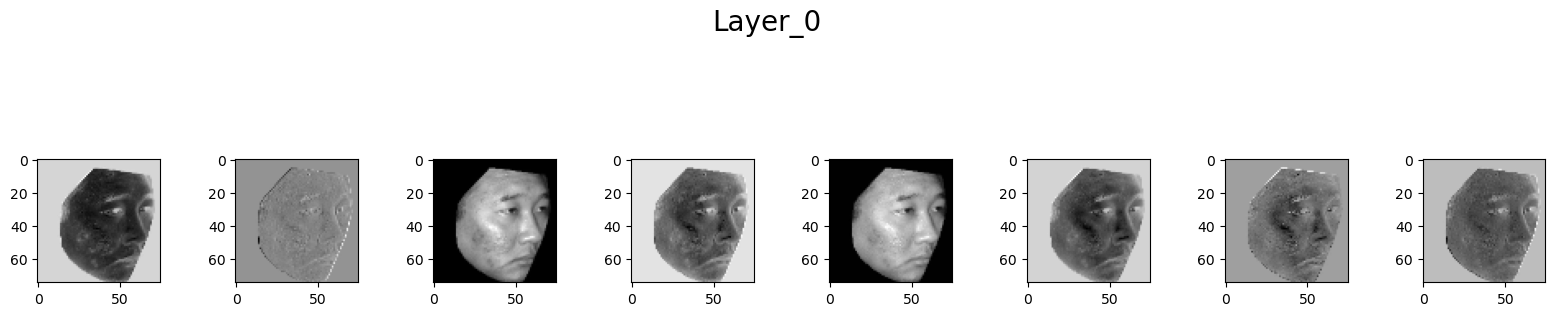

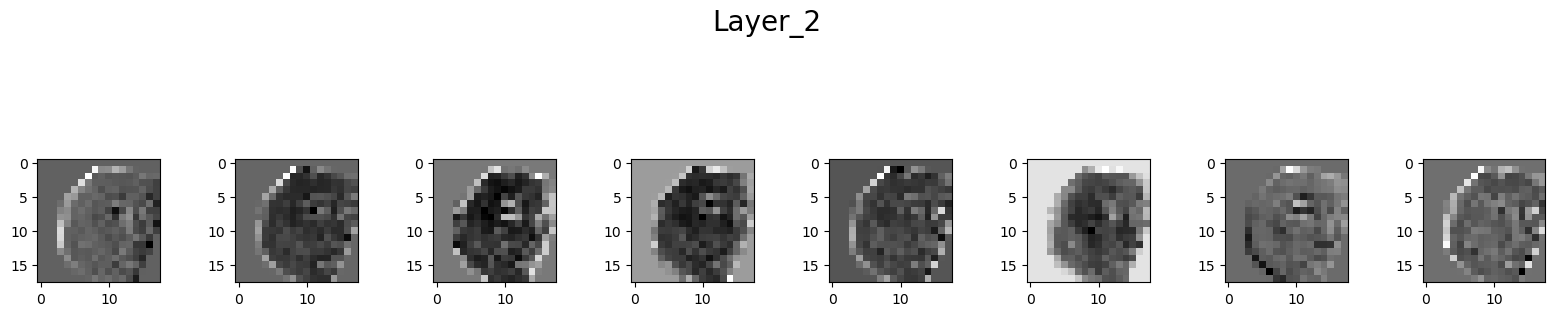

In [19]:
layer_index = [0,2] # no of hidden convolution layer we put in single array little bit differ than above code
outputs = [model.layers[i].output for i in layer_index]

model2 = kt.Model(inputs= model.inputs, outputs = outputs)

feature_map = model2.predict(img)

for i,fmap in zip(layer_index,feature_map):
    fig = plt.figure(figsize=(20,15))
    fig.suptitle("Layer_{}".format(i) , fontsize=20)
    for i in range(1,features.shape[3]+1):
        plt.subplot(8,8,i)
        plt.imshow(fmap[0,:,:,i-1] , cmap='gray')
    
plt.show()

1/1 [==============================] - 0s 48ms/step


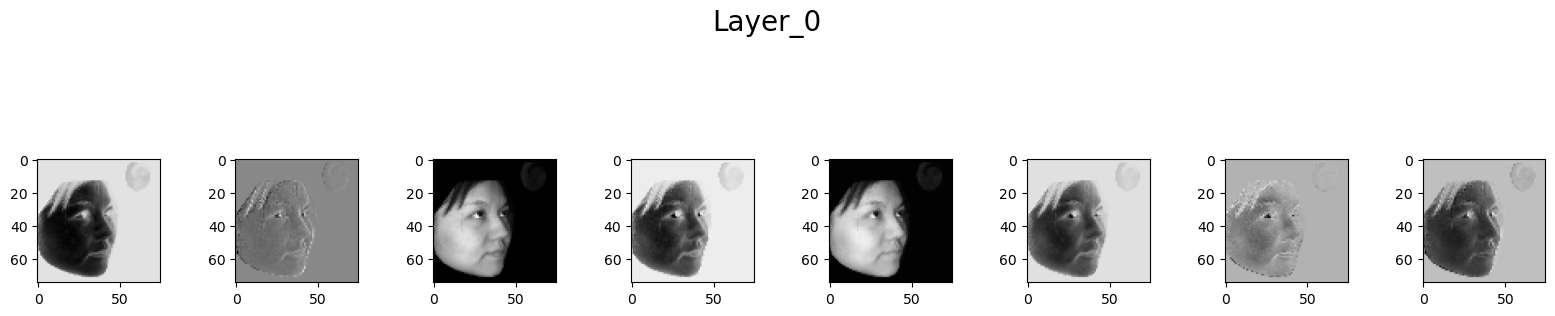

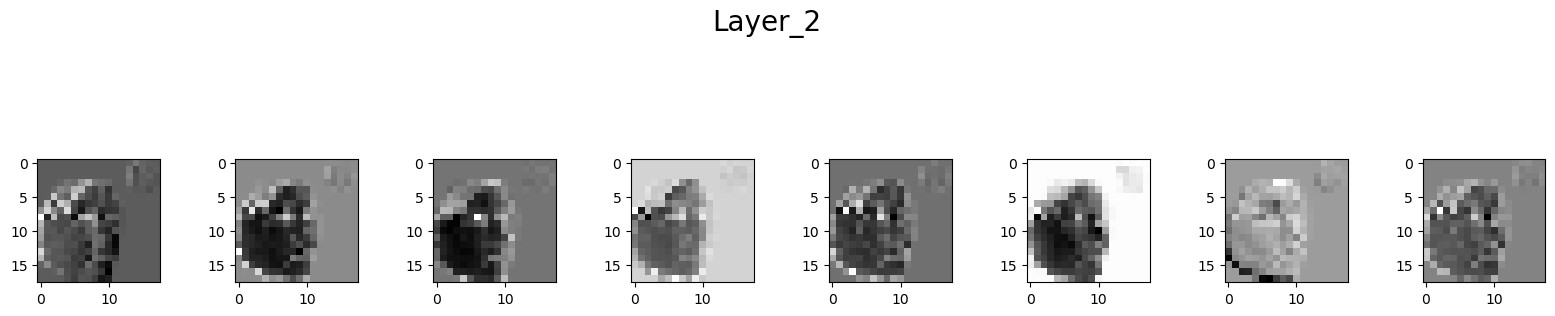

In [20]:
layer_index = [0,2] # no of hidden convolution layer we put in single array little bit differ than above code
outputs = [model.layers[i].output for i in layer_index]

model2 = kt.Model(inputs= model.inputs, outputs = outputs)

feature_map = model2.predict(img1)

for i,fmap in zip(layer_index,feature_map):
    fig = plt.figure(figsize=(20,15))
    fig.suptitle("Layer_{}".format(i) , fontsize=20)
    for i in range(1,features.shape[3]+1):
        plt.subplot(8,8,i)
        plt.imshow(fmap[0,:,:,i-1] , cmap='gray')
    
plt.show()

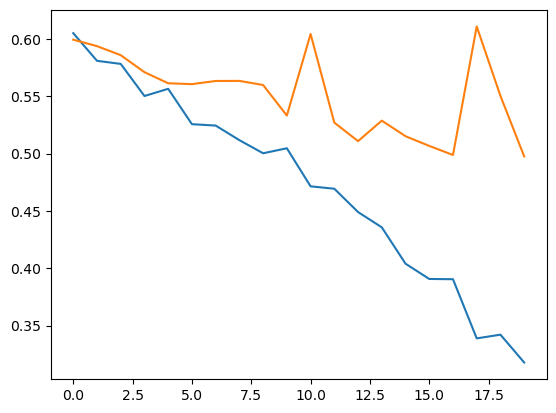

In [21]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

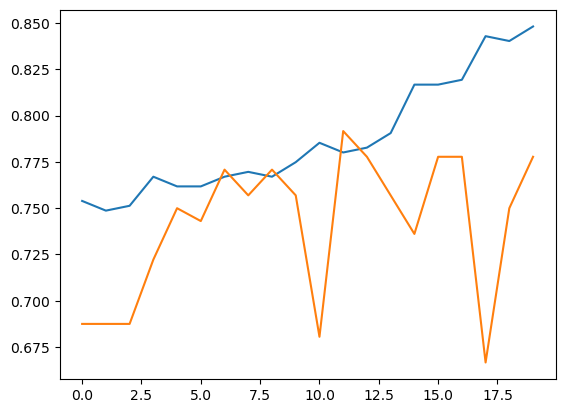

In [22]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

Using Keras tunner to find following parameter

a) Total number of convolution layer to be used along with no of filters, kernel size, padding to be used

b) Total pooling layer to be used

c) Total no of Dense or FCL layer to be used along with no of perceptron and activation function to be used


And using Generator to generate some random images from the sample data

In [23]:
train_try=image.ImageDataGenerator(rotation_range=45,
                        shear_range=0.1,
                        zoom_range=0.2,
                        horizontal_flip=True,
                        width_shift_range=0.1,
                        height_shift_range=0.1,
                        rescale = 1/255)

test_try=image.ImageDataGenerator(rescale = 1/255)

In [24]:
train_1= train_try.flow_from_directory('acne-data/Created Dataset/train/',
                                 class_mode='binary',
                                 batch_size=8,
                                target_size=(150, 150))
test_1= test_try.flow_from_directory('acne-data/Created Dataset/test/',
                               class_mode='binary',
                               batch_size=8,
                              target_size=(150, 150))

Found 382 images belonging to 2 classes.
Found 144 images belonging to 2 classes.


In [42]:
def build_model(hp):
    model_try= Sequential()
    
    for i in range(hp.Int('num_layers_conv',min_value=1,max_value=4)):
        if i == 0: 
            model_try.add(Conv2D(
                filters= hp.Choice('perceptron',values=[2,4,8,16,32]),
                kernel_size= hp.Int('kernel_size',min_value=2,max_value=8),
                activation='relu',
                padding = hp.Choice('padding',values=['Same','valid']),
                input_shape = (150, 150, 3)))
            model_try.add(MaxPooling2D(pool_size = hp.Int('pool_size'+str(i+1),min_value=2,max_value=8)))
        else:
            model_try.add(Conv2D(
                filters= hp.Choice('perceptron',values=[2,4,8,16,32]),
                kernel_size= hp.Int('kernel_size',min_value=2,max_value=8),
                activation='relu',
                padding = hp.Choice('padding',values=['Same','valid'])))
            model_try.add(MaxPooling2D(pool_size = hp.Int('pool_size'+str(i),min_value=2,max_value=8)))
        
        model_try.add(Dropout(hp.Choice('dropout',values=[0.2,0.4,0.5,0.6,0.7])))

        model_try.add(Flatten())

        for j in range(hp.Int('num_layers_FCL',min_value=1,max_value=4)):
            model_try.add(Dense(units= hp.Int('perceptron',min_value=2,max_value=32),
                                activation = "relu"))
            model_try.add(Dropout(hp.Choice('dropout',values=[0.2,0.4,0.5,0.6,0.7])))

    model_try.add(Dense(1,activation ="sigmoid"))
        
    model_try.compile(optimizer='Adam', loss='binary_crossentropy', metrics='accuracy')
                          
    return model_try


In [43]:
import keras_tuner

In [44]:
tunner = keras_tuner.GridSearch(build_model, objective='val_accuracy',max_trials=5,directory='direc/trial')

In [45]:
tunner.search(train_1,epochs=5,validation_data=test_1)

Trial 5 Complete [00h 00m 24s]
val_accuracy: 0.6875

Best val_accuracy So Far: 0.6875
Total elapsed time: 00h 02m 06s
INFO:tensorflow:Oracle triggered exit


In [46]:
tunner.get_best_hyperparameters()[0].values

{'num_layers_conv': 1,
 'perceptron': 2,
 'kernel_size': 2,
 'padding': 'Same',
 'pool_size1': 2,
 'dropout': 0.2,
 'num_layers_FCL': 1}

In [47]:
model_1 = tunner.get_best_models(num_models=1)[0]
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 2)       26        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 2)        0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 75, 2)         0         
                                                                 
 flatten (Flatten)           (None, 11250)             0         
                                                                 
 dense (Dense)               (None, 2)                 22502     
                                                                 
 dropout_1 (Dropout)         (None, 2)                 0         
                                                        

In [48]:
hist_1=model_1.fit_generator(train_1, epochs=15, initial_epoch=6, validation_data=test_1)

Epoch 7/15


C:\Users\ankro\AppData\Local\Temp\ipykernel_7816\3326736679.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist_1=model_1.fit_generator(train_1, epochs=15, initial_epoch=6, validation_data=test_1)


48/48 [==============================] - 5s 98ms/step - loss: 0.5977 - accuracy: 0.7539 - val_loss: 0.6042 - val_accuracy: 0.6875
Epoch 8/15
48/48 [==============================] - 4s 93ms/step - loss: 0.5898 - accuracy: 0.7539 - val_loss: 0.6049 - val_accuracy: 0.6875
Epoch 9/15
48/48 [==============================] - 4s 93ms/step - loss: 0.5833 - accuracy: 0.7539 - val_loss: 0.6129 - val_accuracy: 0.6875
Epoch 10/15
48/48 [==============================] - 5s 98ms/step - loss: 0.5644 - accuracy: 0.7539 - val_loss: 0.5979 - val_accuracy: 0.6875
Epoch 11/15
48/48 [==============================] - 4s 93ms/step - loss: 0.5791 - accuracy: 0.7539 - val_loss: 0.5975 - val_accuracy: 0.6875
Epoch 12/15
48/48 [==============================] - 5s 94ms/step - loss: 0.5962 - accuracy: 0.7539 - val_loss: 0.5924 - val_accuracy: 0.6875
Epoch 13/15
48/48 [==============================] - 5s 96ms/step - loss: 0.5798 - accuracy: 0.7539 - val_loss: 0.5909 - val_accuracy: 0.6875
Epoch 14/15
48/48 [=

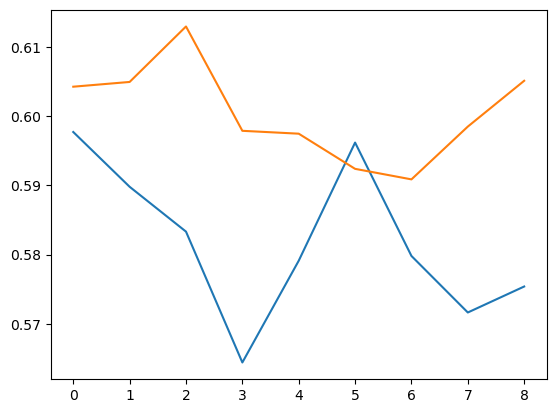

In [49]:
plt.plot(hist_1.history['loss'],label='Train')
plt.plot(hist_1.history['val_loss'],label='Test')

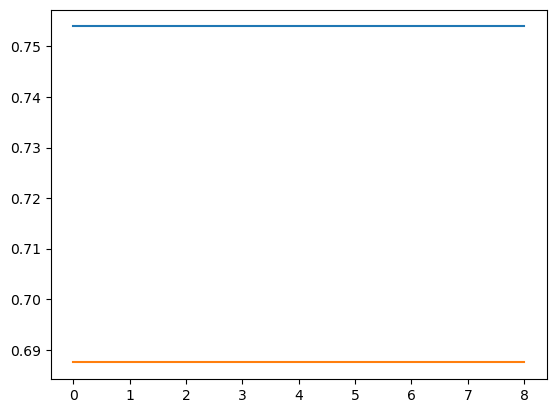

In [50]:
plt.plot(hist_1.history['accuracy'], label='Train')
plt.plot(hist_1.history['val_accuracy'], label='Test')

Predicting on new input

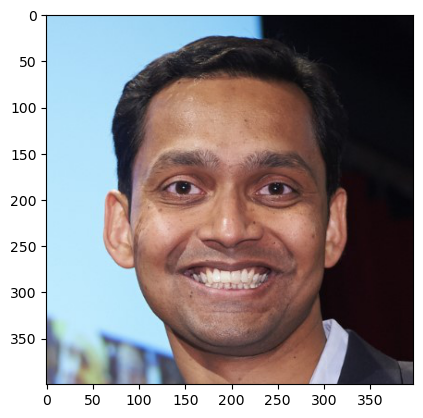

In [51]:
img=cv2.imread('C:/Users/ankro/OneDrive/Desktop/1.jpg')
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

import matplotlib.pyplot as plt

plt.imshow(img)

In [52]:
def rmvbgr(image_rgb):
    rectangle = (60, 110, 280, 260) # upper-left corner (x,y) and its width and height (w,h). tuple should be (x, y, w, h).

    mask = np.zeros(image_rgb.shape[:2], np.uint8) #specifies which parts of the image belong to the foreground, which parts belong to the background, and which parts are unknown

    bgdModel = np.zeros((1, 65), np.float64) # This is the background model used by the algorithm
    fgdModel = np.zeros((1, 65), np.float64) # This is the foreground model used by the algorithm

    cv2.grabCut(image_rgb, mask, rectangle, bgdModel, fgdModel, 1, cv2.GC_INIT_WITH_RECT)

    mask_2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

    image_rgd_nobg = image_rgb * mask_2[:, :, np.newaxis]
    
    return image_rgd_nobg

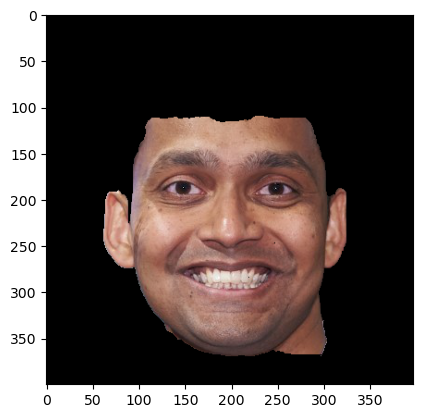

In [53]:
img=rmvbgr(img)
plt.imshow(img)

In [54]:
img=cv2.resize(img,dsize=(150,150))

In [55]:
img = img.reshape((1,) + img.shape)
img.shape

(1, 150, 150, 3)

In [56]:
datagen = image.ImageDataGenerator(rescale=1/255)

In [88]:
pred_0 = model.predict(datagen.flow(img, batch_size=1))
pred_1 = model_1.predict(datagen.flow(img, batch_size=1))

1/1 [==============================] - 0s 37ms/step


Performaing voting to vote out more accurate result

In [97]:
vote=[]
for vot in range(1,3):
    vote.append(np.where(locals()["pred_"+str(vot)][0][0],0,1))

print(vote)

[array(0), array(0)]


In [98]:
count_0=0
count_1=0

for k in vote:
    if k==0:
        count_0 +=1
    else:
        count_1 +=1
print('no_of model predicting not having acne is' ,count_0,'no_of model predicting having acne is',count_1)

no_of model predicting not having acne is 2 no_of model predicting having acne is 0


In [ ]:
stop here

Resnet18-Project